### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Loading data

In [3]:
df = pd.read_csv("../data/insurance.csv")

### A quick exploration of the dataset

In [4]:
### Shape
df.shape

(1338, 7)

- We have 1338 obsevartions with 6 explanatory variables and 1 response varibles

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


- From previous two commands, we see that we have `expsenses`, as the response variable. This is what we want to predict. 

#### Distribution of the response variable

In [6]:
df['expenses'].describe()

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: expenses, dtype: float64

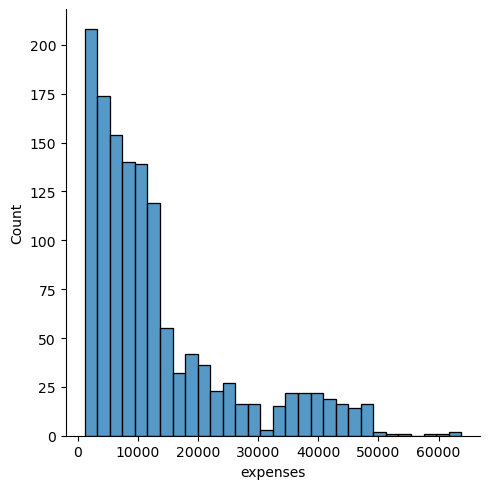

In [7]:
sns.displot(data=df, x="expenses", kind="hist")

- The distribution is right-skewed showing that large number of our observations in the dataset pay less than 20 thousand.

### Understanding the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- We notice that the response variable is numeric and continuous.
- We have three numerical explanatory variables: `age`, `bmi`, `children`,  and three categorical variables: `sex`, `smoker`, and `region`.

#### Checking for missing values in the dataset

In [9]:
print('Missing values:')
df.isnull().sum()

Missing values:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

- We see that our dataset has no missing values, which is a good thing at this point.

#### Data preprocessing.

- We would like for convert all categorical variables to numeric variable by using `OneHotEncoder` and `LabelBinarizer`. 

In [10]:
### Importing preprocessing module.
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

##### Convert `sex` and `smoker` to numerical data


In [11]:
lb = LabelBinarizer()
df.sex = lb.fit_transform(df.sex)
df.smoker = lb.fit_transform(df.smoker)

In [12]:
df.sex.unique()

array([0, 1])

##### Convert Region to numerical representation using OneHotEncoder

In [13]:
### Instantiate OneHotEncoder
ohe = OneHotEncoder()

### Convert region to string
region = ohe.fit_transform(df[["region"]]).toarray()
region_labels = np.array(ohe.categories_).ravel()
df2 = pd.DataFrame(region, columns=region_labels)

# Create a new dataframe
df = pd.concat([df, df2], axis=1)

### Exploring relationships among features.

<AxesSubplot: >

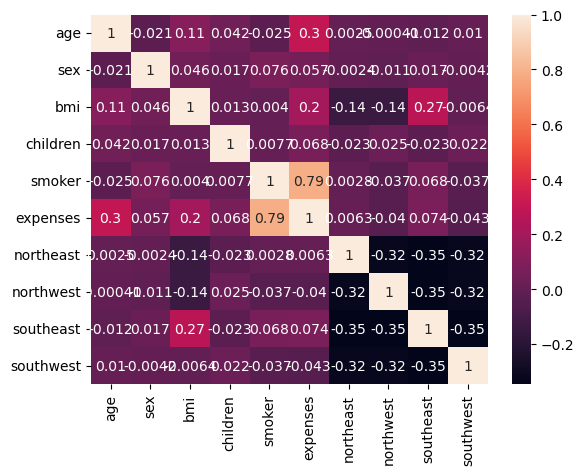

In [14]:
sns.heatmap(df.corr(), annot=True)

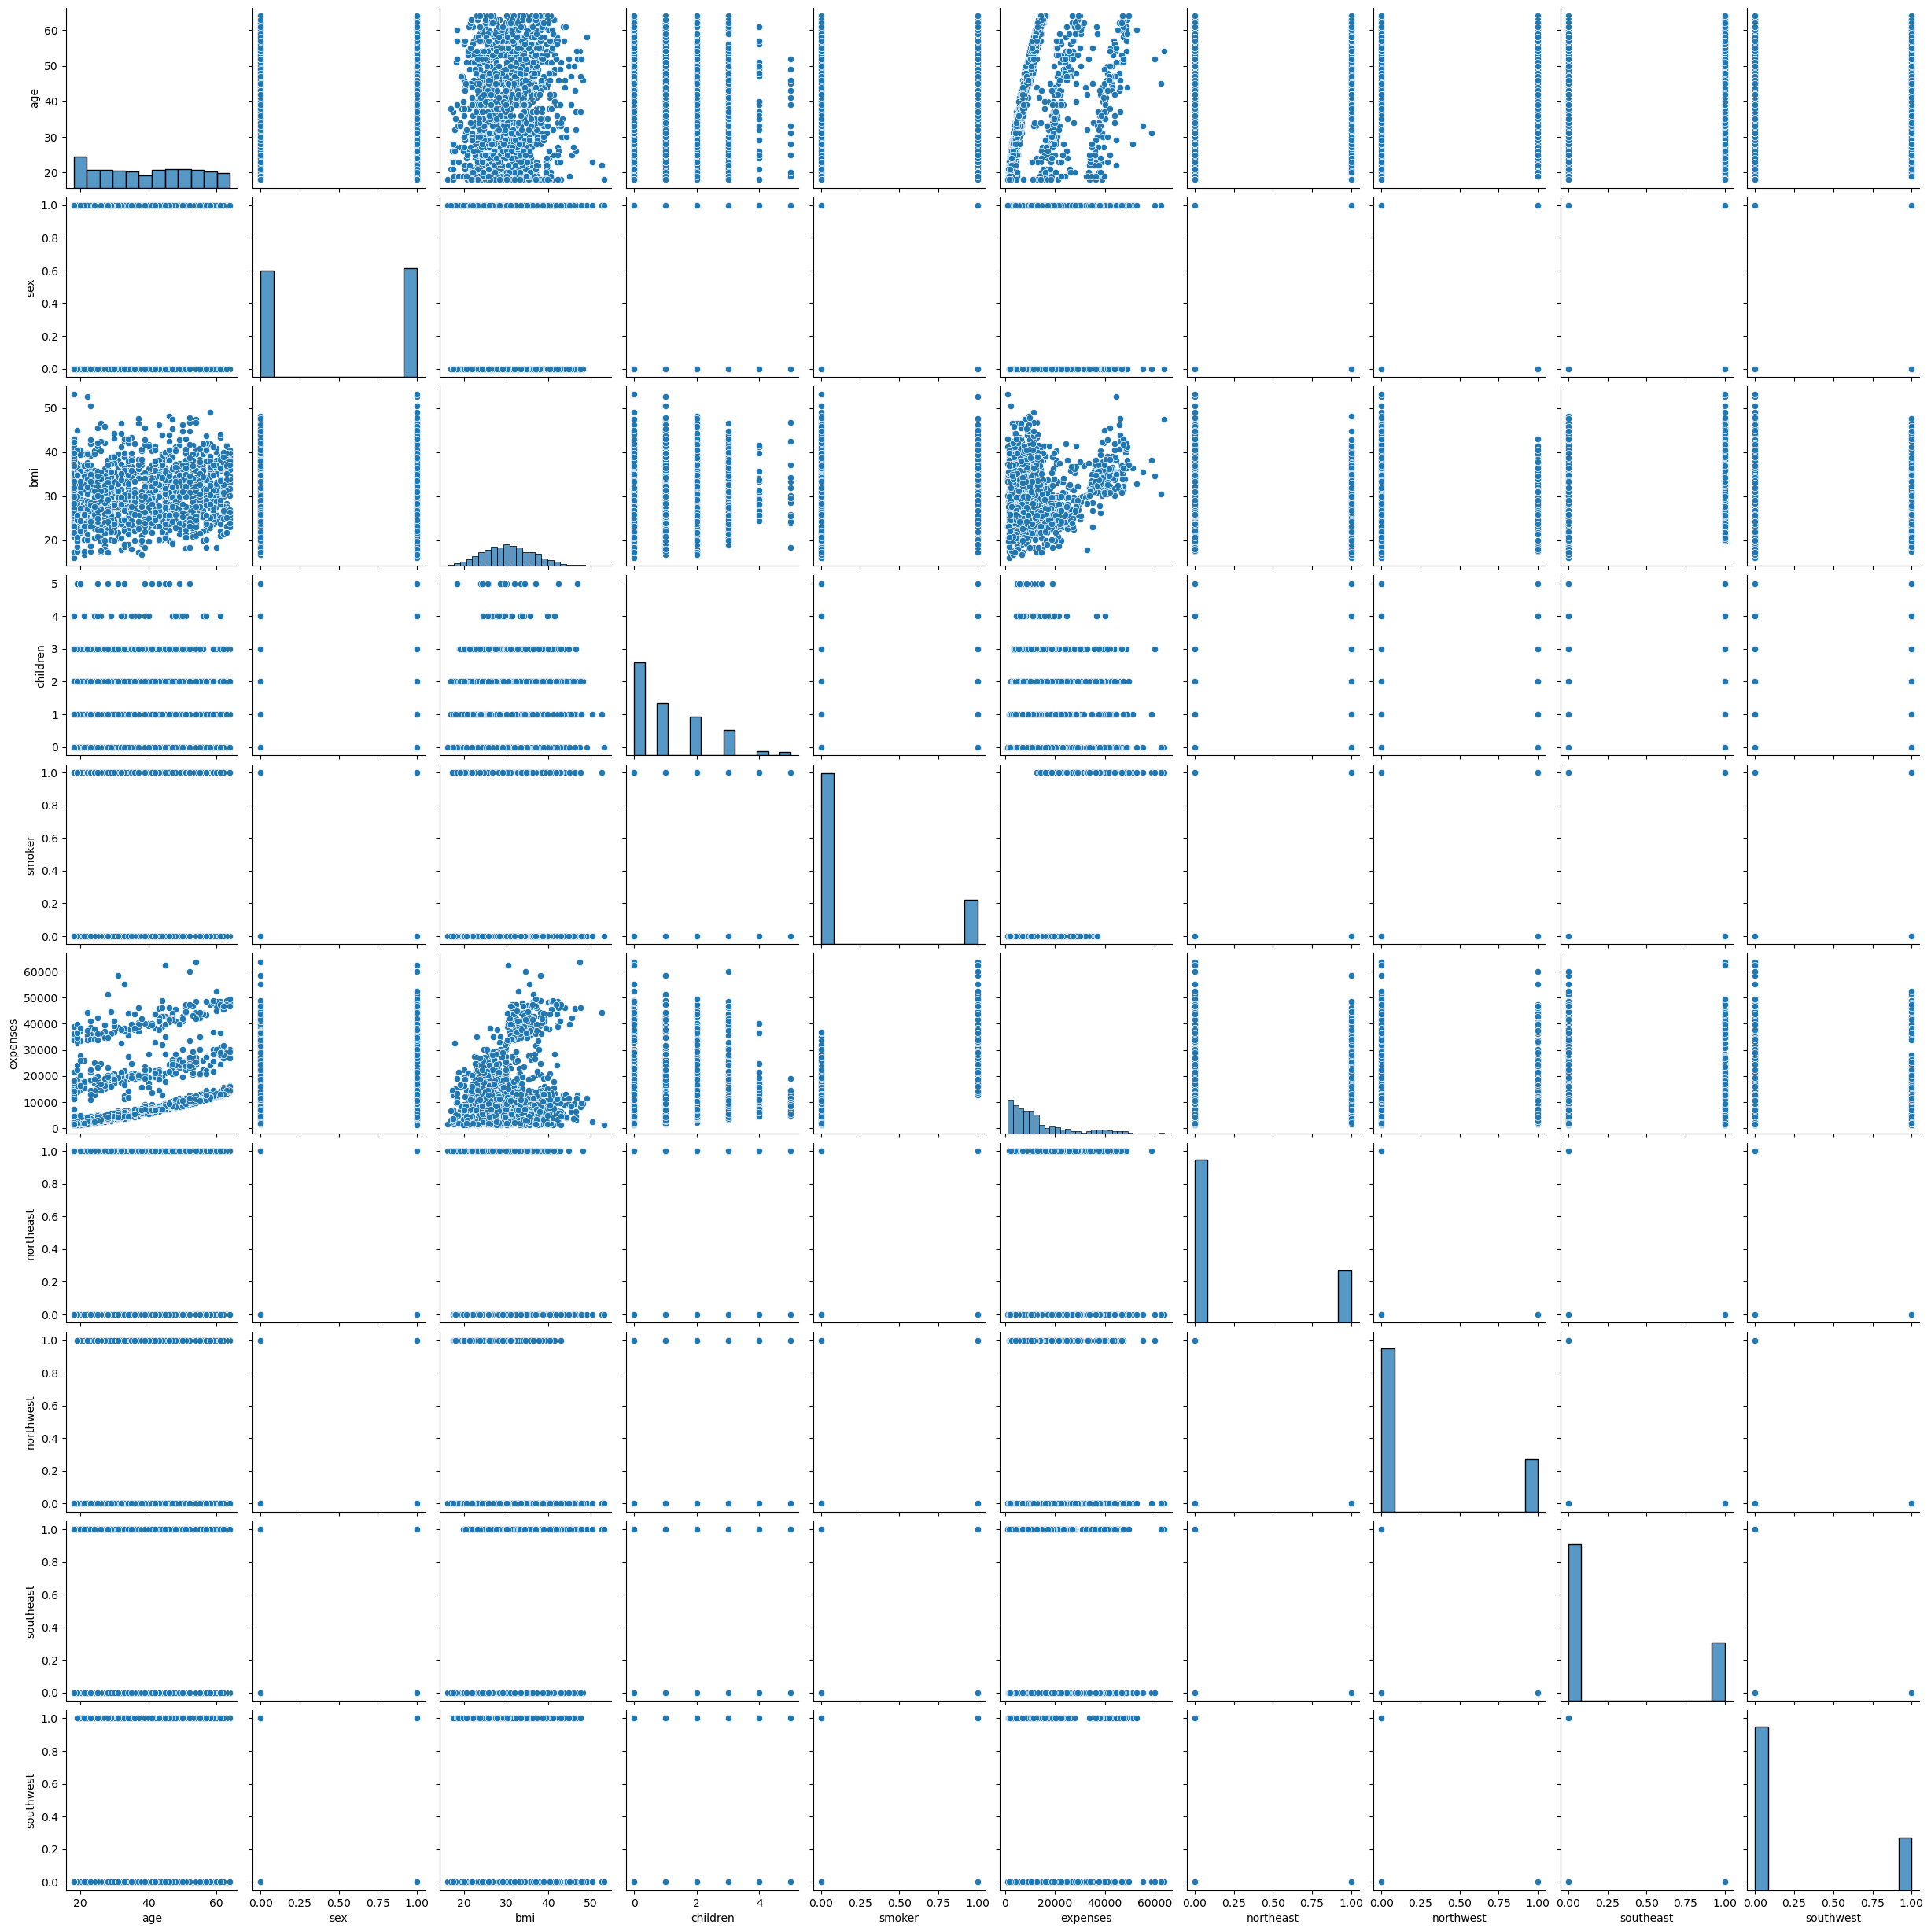

In [15]:
sns.pairplot(data=df)

In [22]:
### Splitting data into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def train_test_split_dataset(data, explanatory_vars, response_var):
    X = data[explanatory_vars]
    y = data[response_var]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Explanatory and response variables
exp_vars = ["age", "children", "bmi", "sex", "smoker", "northeast", "northwest", "southeast", "southwest"]
res_var = "expenses"

### Get the train and test sets
X_train, X_test, y_train, y_test = train_test_split_dataset(df, exp_vars, res_var)

### Building model
lm = LinearRegression()

## Fitting the training data
lm.fit(X_train, y_train)

### Model coefficients and model R2_scores
score = lm.score(X_test, y_test)
alpha = lm.coef_
beta = lm.intercept_

for i in range(alpha.size):
    print(exp_vars[i], ": ", alpha[i])
print("The intercept of the slop is: ", beta)

print("Score: ", score)

age :  256.9559592853926
children :  425.6413756516942
bmi :  337.27147292786566
sex :  -18.519740709120228
smoker :  23650.31230218345
northeast :  459.5639429217199
northwest :  89.25043158742517
southeast :  -199.14843912476033
southwest :  -349.66593538438065
The intercept of the slop is:  -12396.338370213804
Score:  0.7835726930039906


In [24]:
### Evaluate model performance
y_pred = lm.predict(X_test)

print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2-score: ", r2_score(y_test, y_pred))

Mean Absolute Error:  4181.561524000782
Mean Squared Error:  33600065.355077825
R2-score:  0.7835726930039906


## Model Improvement

### Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = "../src/insurance_expense_model.sav"
pickle.dump(lm, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, "rb"))

In [ ]:
loaded_model.predict([[45, 3, 25, 1, 1, 1, 0, 0, 0]])

/home/fra-majawa/.conda/envs/envi/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([32966.74725218])

### Testing the API

In [ ]:
import requests
import json

In [ ]:
base_url =  "http://127.0.0.1:8000"

data = {
    "age" : 45,
    "children": 3,
    "bmi": 25,
    "sex": 1,
    "smoker": 1,
    "northeast": 1,
    "northwest": 0,
    "southeast": 0,
    "southwest": 0
}

data_json = json.dumps(data)

print(data_json)

response = requests.post(base_url + "/insurance_expenses_prediction/", data=data_json)

# response = requests.get(base_url)
res = response.text

print(float(res.replace('"', '')))

{"age": 45, "children": 3, "bmi": 25, "sex": 1, "smoker": 1, "northeast": 1, "northwest": 0, "southeast": 0, "southwest": 0}
32966.74725217664
